In [105]:
import zipfile
import gdown
import os

FILE_ID = "1q6F59wk1WxhPfkxIg4Cr0Y7fCdXTTIBz"
zip_path = "booking-status-dataset.zip"

gdown.download(id=FILE_ID, output=zip_path, quiet=False)

DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(DATA_DIR)


Downloading...
From: https://drive.google.com/uc?id=1q6F59wk1WxhPfkxIg4Cr0Y7fCdXTTIBz
To: /content/booking-status-dataset.zip
100%|██████████| 490k/490k [00:00<00:00, 96.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

print(train.shape, test.shape)


(29500, 14) (7000, 13)


**Data exploration and Understanding:**

In [110]:
train.head()

,id,adults,children,weekends,weekdays,meal_type,room_type,arrival,lead_time,segment,repeat,price,requests,booking_status
0,0,2,0,0,1,Not Selected,Room_Type 1,2018-05-21,54.0,Online,0,116.10,0,1
1,1,1,0,3,6,Not Selected,Room_Type 1,2018-11-12,12.0,Online,0,71.87,1,1
2,2,2,0,0,2,Meal Plan 1,Room_Type 2,2018-01-06,34.0,Online,0,71.55,1,0
3,3,1,0,2,1,Meal Plan 1,Room_Type 1,2018-02-14,4.0,Corporate,1,66.00,0,0
4,4,2,0,2,3,Meal Plan 1,Room_Type 1,2018-07-08,155.0,Offline,0,72.25,0,0


In [111]:
# Information regarding the datatypes of the columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29500 non-null  int64  
 1   adults          29500 non-null  int64  
 2   children        29500 non-null  int64  
 3   weekends        29500 non-null  int64  
 4   weekdays        29500 non-null  int64  
 5   meal_type       29500 non-null  object 
 6   room_type       28659 non-null  object 
 7   arrival         29500 non-null  object 
 8   lead_time       27805 non-null  float64
 9   segment         29500 non-null  object 
 10  repeat          29500 non-null  int64  
 11  price           27917 non-null  float64
 12  requests        29500 non-null  int64  
 13  booking_status  29500 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 3.2+ MB


In [112]:
# Descriptive Statistics of the Numerical Columns
train.drop(columns=['id','booking_status']).describe()

,adults,children,weekends,weekdays,lead_time,repeat,price,requests
count,29500.000000,29500.000000,29500.000000,29500.000000,27805.000000,29500.000000,27917.000000,29500.000000
mean,1.843559,0.106576,0.808136,2.202237,85.405431,0.026000,103.483304,0.619661
std,0.518711,0.405517,0.868835,1.404200,85.939750,0.159138,35.120922,0.785919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,58.000000,0.000000,99.880000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,127.000000,0.000000,120.180000,1.000000
max,4.000000,10.000000,6.000000,17.000000,443.000000,1.000000,375.500000,5.000000


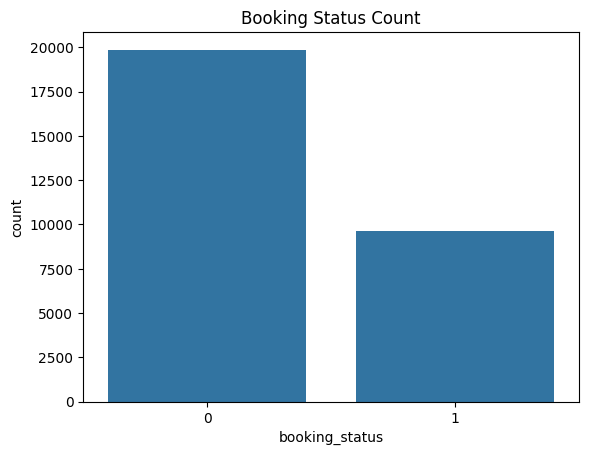

In [113]:
# Distribution of Target Variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x='booking_status')
plt.title("Booking Status Count")
plt.show()

**Distribution of Booking Status:**
This plot shows the frequency of cancellations vs non-cancellations in the raw dataset. It helps identify whether the classes are balanced, which is important for choosing appropriate evaluation metrics and model strategies.

In [114]:
# Check for missing values
train.isna().sum()

,0
id,0
adults,0
children,0
weekends,0
weekdays,0
meal_type,0
room_type,841
arrival,0
lead_time,1695
segment,0


In [115]:
test.isna().sum()

,0
id,0
adults,0
children,0
weekends,0
weekdays,0
meal_type,0
room_type,1660
arrival,0
lead_time,412
segment,0


In [116]:
print("Duplicates in the train dataset:" ,train.duplicated().sum())
print("Duplicates in the test dataset:" ,test.duplicated().sum())

Duplicates in the train dataset: 0
Duplicates in the test dataset: 0


Thus, there doesn't exist any duplicates in the dataset.

In [117]:
print(train.columns)
print(test.columns)

Index(['id', 'adults', 'children', 'weekends', 'weekdays', 'meal_type',
       'room_type', 'arrival', 'lead_time', 'segment', 'repeat', 'price',
       'requests', 'booking_status'],
      dtype='object')
Index(['id', 'adults', 'children', 'weekends', 'weekdays', 'meal_type',
       'room_type', 'arrival', 'lead_time', 'segment', 'repeat', 'price',
       'requests'],
      dtype='object')


**Splitting the data into Feature and Target Columns**

In [118]:
x_train= train.drop(columns='booking_status')
y_train= train['booking_status']

**Outlier Handling**

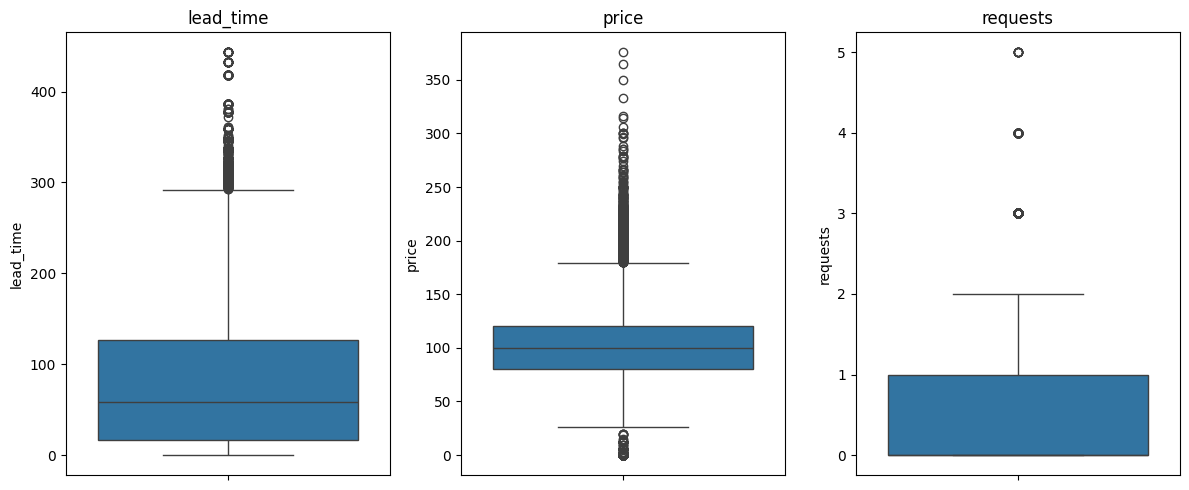

In [120]:
cols = ["lead_time", "price", "requests"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(cols):
    sns.boxplot(y=x_train[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


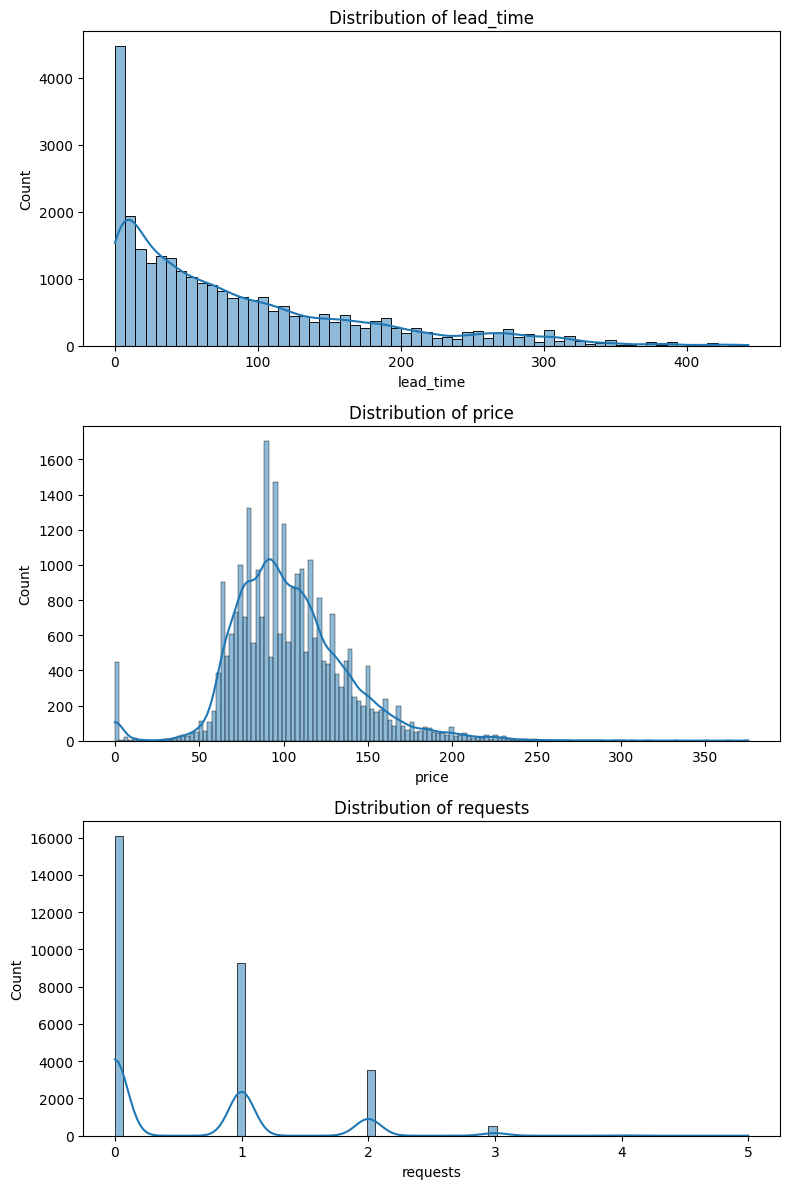

In [122]:
fig, axes = plt.subplots(len(cols), 1, figsize=(8, 4*len(cols)))

for i, col in enumerate(cols):
    sns.histplot(x_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

No outlier is being dropped because:

**1. lead_time**

Observations:

* Very right-skewed (heavy tail).

* Many values > 300 days.

* These are not errors — in hotel businesses, booking 6–12 months early is common.




**2. price**

Observations:

* Right-skewed, but the distribution is natural for hotel prices.

* Prices between 200–350 are rare but valid — luxury rooms, peak dates.

* Very few extreme points, and no impossible values (e.g., negative).




**3. requests**
   
Observations:

* Values from 0 to 5.

* Outliers visually appear only because the range is tiny.

* Values like 3–5 requests are completely normal.

**Missing value handling OR Imputation**

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

trf1= [("mode_imp", SimpleImputer(strategy="most_frequent"),['room_type']),
      ("median_imp", SimpleImputer(strategy="median"),['lead_time','price'])]

ct1= ColumnTransformer(transformers= trf1, remainder="passthrough", verbose_feature_names_out= False).set_output(transform="pandas")
x_train= ct1.fit_transform(x_train)
test = ct1.transform(test)

In [125]:
x_train.isna().sum()

,0
room_type,0
lead_time,0
price,0
id,0
adults,0
children,0
weekends,0
weekdays,0
meal_type,0
arrival,0


In [126]:
test.isna().sum()

,0
room_type,0
lead_time,0
price,0
id,0
adults,0
children,0
weekends,0
weekdays,0
meal_type,0
arrival,0


**Imputation Strategy:**

* room_type: Missing values were imputed using the most frequent category, as the variable is categorical and the mode represents typical room assignments.

* price: The distribution of price is right-skewed; therefore, median imputation was preferred over mean to reduce the influence of high-value points.

* lead_time: Since lead_time is also highly skewed and contains natural long-tail values, median imputation was chosen instead of KNNImputer to avoid instability and unnecessary computational overhead.

In [127]:
train_imp = x_train.copy()
train_imp['booking_status'] = y_train.values

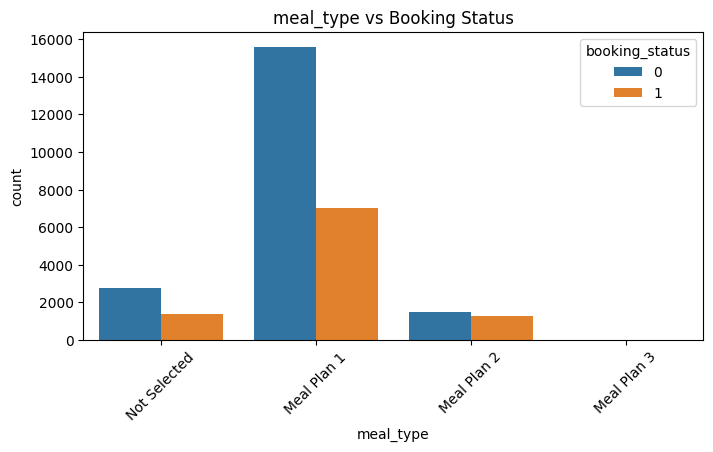

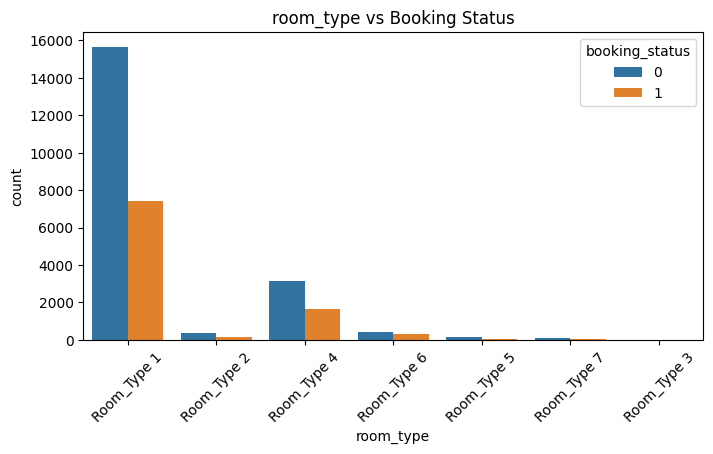

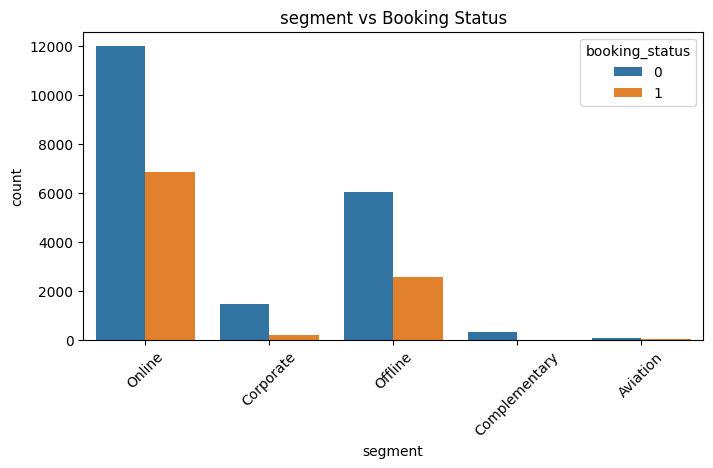

In [128]:
# Countplots for Categorical Features
cat_cols = ['meal_type', 'room_type', 'segment']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train_imp, x=col, hue='booking_status')
    plt.title(f"{col} vs Booking Status")
    plt.xticks(rotation=45)
    plt.show()


**Categorical Feature Countplots:**
These visualizations show how categories such as meal type, room type, and segment are distributed across the dataset, along with their corresponding cancellation outcomes. They provide early insight into whether certain categories are associated with higher cancellation rates.

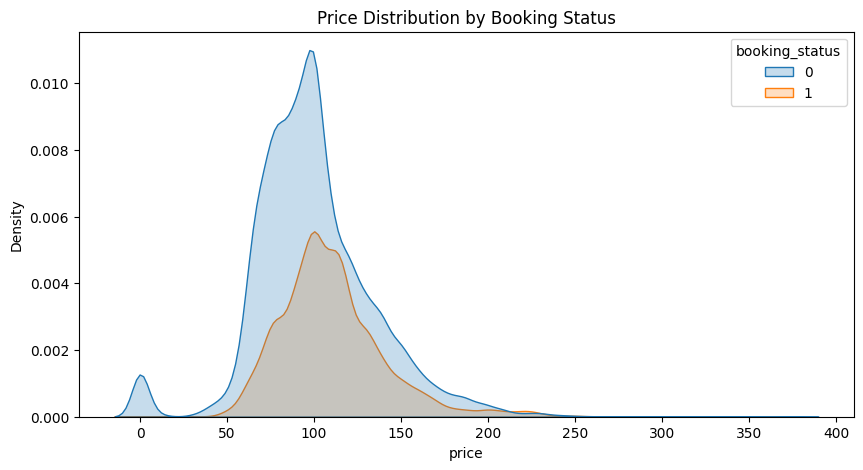

In [129]:
# KDE Plots — Price vs Booking Status
plt.figure(figsize=(10,5))
sns.kdeplot(data=train_imp, x='price', hue='booking_status', fill=True)
plt.title("Price Distribution by Booking Status")
plt.show()

**Price Distribution:**
This plot shows the density of room prices for both cancelled and non-cancelled bookings. It highlights whether cancellation behavior varies across different pricing levels, revealing potential price-sensitive customer segments.

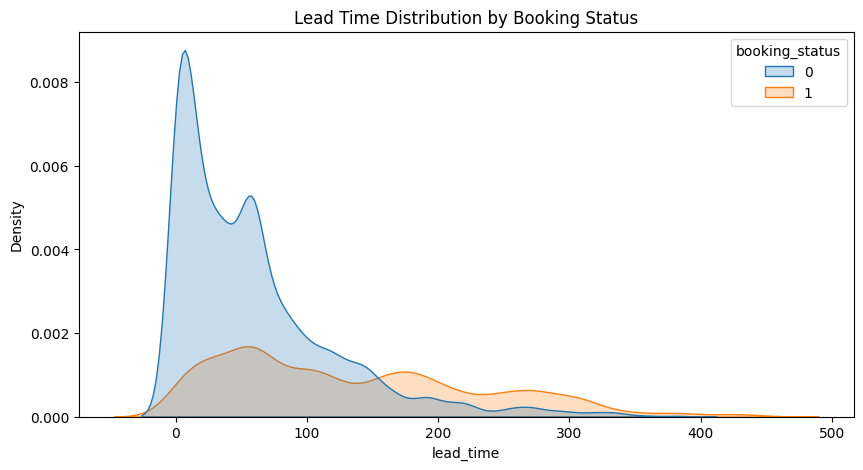

In [130]:
# KDE — Lead Time vs Booking Status
plt.figure(figsize=(10,5))
sns.kdeplot(data=train_imp, x='lead_time', hue='booking_status', fill=True)
plt.title("Lead Time Distribution by Booking Status")
plt.show()


**Lead Time Distribution:**
The KDE plot illustrates how lead time differs between cancelled and non-cancelled bookings. It helps identify whether customers who book far in advance or at the last minute exhibit different cancellation behaviors.

**Feature Engineering**

In [131]:
# Create engineered features
x_train['family_members'] = x_train['adults'] + x_train['children']
x_train['total_nights']   = x_train['weekdays'] + x_train['weekends']
test['family_members'] = test['adults'] + test['children']
test['total_nights']   = test['weekdays'] + test['weekends']

* A new variable family_members was created by summing adults and children to capture total group size. However, the original adults and children columns were retained to preserve information about booking composition.

* Similarly, total_nights was created by adding weekdays and weekends, representing the overall stay duration. Weekdays and weekends were kept separately to allow the model to capture potentially different behavioral patterns between business and leisure travelers.

* Columns will only be removed after evaluating their importance in model performance.

In [132]:
# Categorical Features Encoding
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
cat_cols = ['meal_type', 'room_type', 'segment']

encod=[("ohe",OneHotEncoder(sparse_output=False, drop='first'), cat_cols)]
ct2= ColumnTransformer(transformers= encod, remainder="passthrough", verbose_feature_names_out= False).set_output(transform="pandas")
x_train= ct2.fit_transform(x_train)
test = ct2.transform(test)

In [133]:
# Create more engineered features and drop the unnecessary ones
x_train['arrival'].head()
x_train['arrival'].unique()[:10]


array(['2018-05-21', '2018-11-12', '2018-01-06', '2018-02-14',
       '2018-07-08', '2018-02-16', '2018-05-12', '2018-11-09',
       '2018-02-18', '2018-05-14'], dtype=object)

In [134]:
x_train['arrival'] = pd.to_datetime(x_train['arrival'],  errors='coerce')
test['arrival'] = pd.to_datetime(test['arrival'],  errors='coerce')

In [135]:
x_train['arrival'].isna().sum()

np.int64(29)

In [136]:
test['arrival'].isna().sum()

np.int64(8)

In [ ]:
invalid_rows = x_train[pd.to_datetime(x_train['arrival'], errors='coerce').isna()]

invalid_rows

,meal_type_Meal Plan 2,meal_type_Meal Plan 3,meal_type_Not Selected,room_type_Room_Type 2,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,segment_Complementary,...,id,adults,children,weekends,weekdays,arrival,repeat,requests,family_members,total_nights
632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632,1,0,1,2,NaT,0,1,1,3
1874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1874,1,0,1,1,NaT,0,0,1,2
2912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2912,1,0,1,1,NaT,0,0,1,2
3084,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3084,2,0,1,3,NaT,0,1,2,4
7960,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7960,2,0,1,1,NaT,0,0,2,2
8837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8837,2,0,1,3,NaT,0,0,2,4
8917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8917,1,0,1,1,NaT,0,0,1,2
9352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9352,1,0,1,2,NaT,0,0,1,3
11727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11727,2,1,1,5,NaT,0,1,3,6
12158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12158,2,0,1,5,NaT,0,1,2,6


In [138]:
invalid_rows_test = test[pd.to_datetime(test['arrival'], errors='coerce').isna()]

invalid_rows_test

,meal_type_Meal Plan 2,meal_type_Meal Plan 3,meal_type_Not Selected,room_type_Room_Type 2,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,segment_Complementary,...,id,adults,children,weekends,weekdays,arrival,repeat,requests,family_members,total_nights
1124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1124,2,0,1,3,NaT,0,0,2,4
2029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2029,2,0,1,3,NaT,0,0,2,4
4116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4116,1,0,1,1,NaT,0,0,1,2
4433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4433,2,2,1,3,NaT,0,0,4,4
4735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4735,1,0,1,2,NaT,0,0,1,3
4766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4766,2,0,1,5,NaT,1,0,2,6
4774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4774,2,1,1,3,NaT,0,0,3,4
6283,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6283,1,0,1,2,NaT,0,0,1,3


In [139]:
x_train['arrival'] = pd.to_datetime(x_train['arrival'], errors='coerce')

x_train['arrival_year'] = x_train['arrival'].dt.year
x_train['arrival_month'] = x_train['arrival'].dt.month
x_train['arrival_dayofweek'] = x_train['arrival'].dt.dayofweek

x_train['arrival_year'] = x_train['arrival_year'].fillna(x_train['arrival_year'].mode()[0])
x_train['arrival_month'] = x_train['arrival_month'].fillna(x_train['arrival_month'].mode()[0])
x_train['arrival_dayofweek'] = x_train['arrival_dayofweek'].fillna(x_train['arrival_dayofweek'].mode()[0])

x_train.drop(columns=['arrival'], inplace=True)


In [140]:
test['arrival'] = pd.to_datetime(test['arrival'], errors='coerce')

test['arrival_year'] = test['arrival'].dt.year
test['arrival_month'] = test['arrival'].dt.month
test['arrival_dayofweek'] = test['arrival'].dt.dayofweek

test['arrival_year'] = test['arrival_year'].fillna(x_train['arrival_year'].mode()[0])
test['arrival_month'] = test['arrival_month'].fillna(x_train['arrival_month'].mode()[0])
test['arrival_dayofweek'] = test['arrival_dayofweek'].fillna(x_train['arrival_dayofweek'].mode()[0])

test.drop(columns=['arrival'], inplace=True)


The arrival column contained 29 and 8 invalid date entries (e.g., non-existent calendar dates) in the train and test dataset repectively.
These values were detected using errors='coerce', which converts invalid dates into NaT.
After identifying the affected rows, valid temporal features (year, month, day-of-week) were extracted from the remaining valid entries.
Missing temporal components created by invalid dates were imputed using the mode of each respective field.
Finally, the original arrival column was dropped.

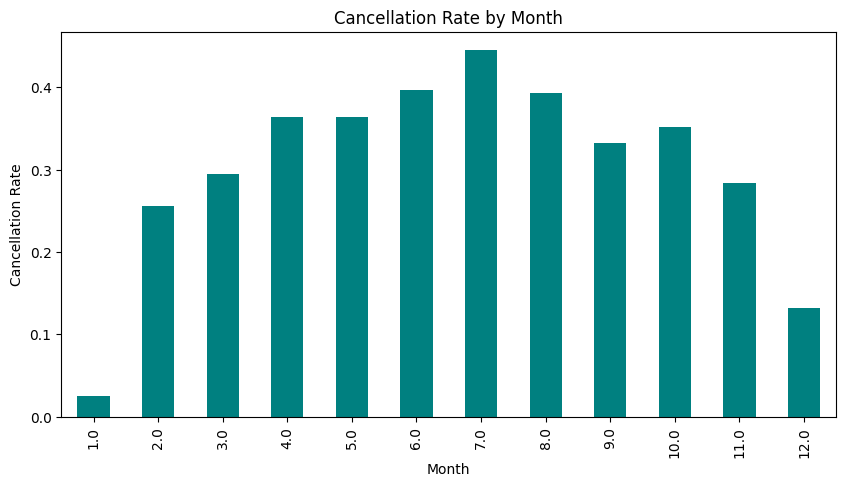

In [141]:
eda_df = x_train.copy()
eda_df['booking_status'] = y_train.values
monthly_cancel = eda_df.groupby('arrival_month')['booking_status'].mean()

plt.figure(figsize=(10,5))
monthly_cancel.plot(kind='bar', color='teal')
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.show()

**Cancellation Rate by Month:**
After extracting the arrival month feature, this plot visualizes the monthly cancellation trends. It helps identify seasonal patterns, peak cancellation months, and how demand cycles may influence customer behavior.

In [142]:
x_train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)


The id column was removed because it is a purely identifying field with no predictive value.

In [143]:
# Scaling Numerical Columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = ['lead_time', 'price', 'adults', 'children',
               'weekends', 'weekdays', 'requests',
               'family_members', 'total_nights']

x_train[scaled_cols] = scaler.fit_transform(x_train[scaled_cols])
test[scaled_cols] = scaler.transform(test[scaled_cols])



Numerical variables such as lead_time, price, total_nights, and family_members were scaled using StandardScaler to support distance-based and linear models.
Binary variables (repeat, encoded features, and date-derived features) were not scaled, as scaling provides no meaningful benefit for such features.

**Glimpse of the Engineered Data**

In [144]:
x_train.head()

,meal_type_Meal Plan 2,meal_type_Meal Plan 3,meal_type_Not Selected,room_type_Room_Type 2,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,segment_Complementary,...,children,weekends,weekdays,repeat,requests,family_members,total_nights,arrival_year,arrival_month,arrival_dayofweek
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.262821,-0.930153,-0.856187,0,-0.788468,0.076610,-1.133377,2018.0,5.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.262821,2.522805,2.704620,0,0.483950,-1.459763,3.376739,2018.0,11.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.262821,-0.930153,-0.144026,0,0.483950,0.076610,-0.569612,2018.0,1.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.262821,1.371819,-0.856187,1,-0.788468,-1.459763,-0.005848,2018.0,2.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.262821,1.371819,0.568136,0,-0.788468,0.076610,1.121681,2018.0,7.0,6.0


In [145]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   meal_type_Meal Plan 2   29500 non-null  float64
 1   meal_type_Meal Plan 3   29500 non-null  float64
 2   meal_type_Not Selected  29500 non-null  float64
 3   room_type_Room_Type 2   29500 non-null  float64
 4   room_type_Room_Type 3   29500 non-null  float64
 5   room_type_Room_Type 4   29500 non-null  float64
 6   room_type_Room_Type 5   29500 non-null  float64
 7   room_type_Room_Type 6   29500 non-null  float64
 8   room_type_Room_Type 7   29500 non-null  float64
 9   segment_Complementary   29500 non-null  float64
 10  segment_Corporate       29500 non-null  float64
 11  segment_Offline         29500 non-null  float64
 12  segment_Online          29500 non-null  float64
 13  lead_time               29500 non-null  float64
 14  price                   29500 non-null

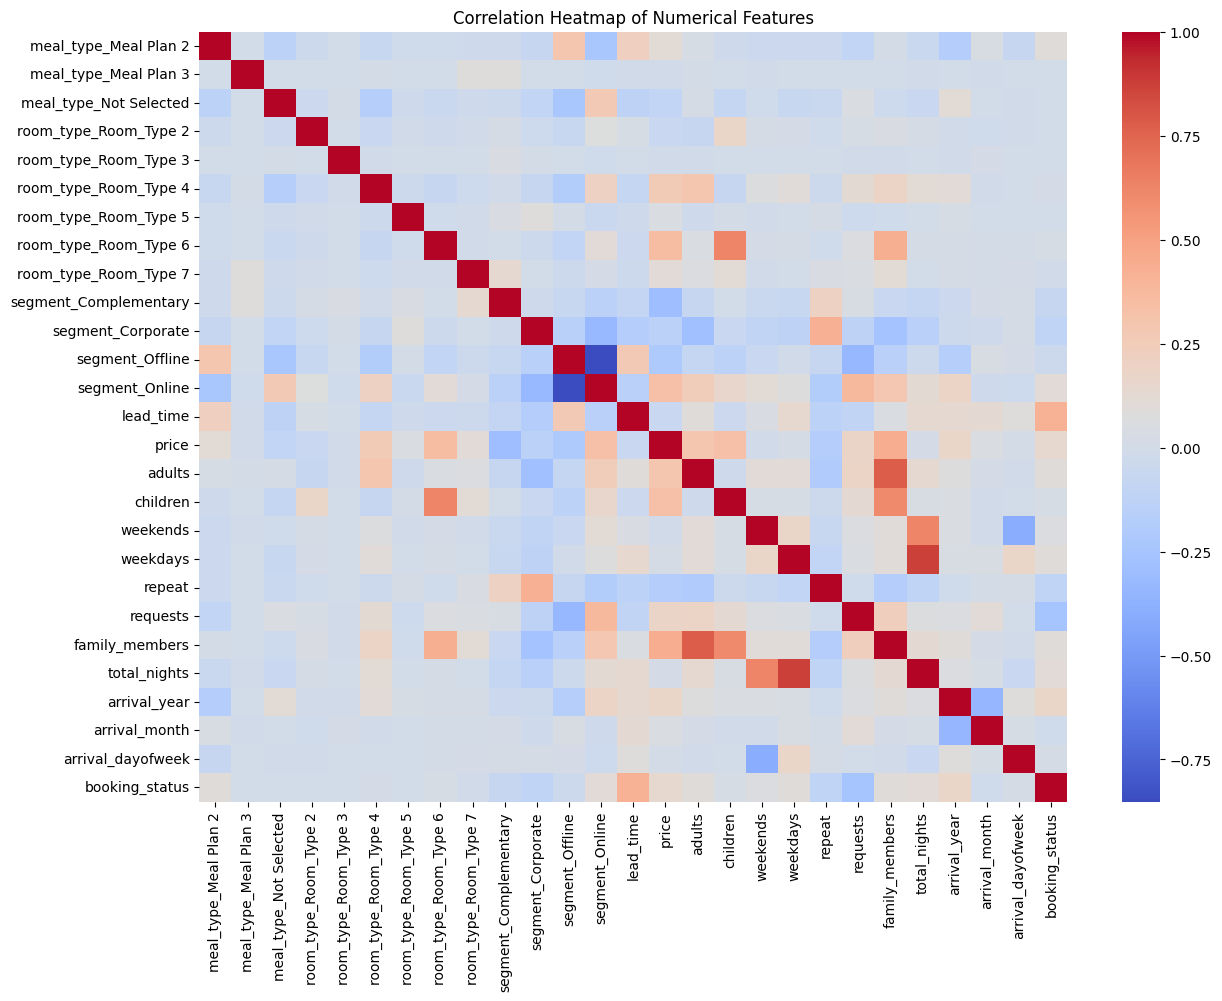

In [146]:
eda_df = x_train.copy()
eda_df['booking_status'] = y_train.values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(eda_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Correlation Heatmap:**
This heatmap displays the correlation between all engineered and encoded features. It highlights relationships between numerical variables and their association with the target. This step is crucial before feature selection, as it helps identify multicollinearity and signals which features may be strong predictors.

In [147]:
print(x_train.shape)
print(test.shape)
print(set(x_train.columns) == set(test.columns))


(29500, 26)
(7000, 26)
True


**Model Building**

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train,                      # features
    y_train,                      # target
    test_size=0.2,                # 80/20 split
    random_state=42,              # reproducibility
    stratify=y_train              # keeps class ratio same in both sets
)

In [149]:
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train_split:", y_train_split.shape)
print("y_val:", y_val.shape)


X_train: (23600, 26)
X_val: (5900, 26)
y_train_split: (23600,)
y_val: (5900,)


In [150]:
# Evaluation function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(model, X_val, y_val):
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)

    print(f"Validation Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_val, preds))
    print("\nConfusion Matrix:\n", confusion_matrix(y_val, preds))

    return acc


In [151]:
# 1. Logistic Regression (Baseline Linear Model)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=0)
lr.fit(X_train, y_train_split)

print("Logistic Regression:")
evaluate(lr, X_val, y_val)


Logistic Regression:
Validation Accuracy: 0.8010

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      3974
           1       0.73      0.62      0.67      1926

    accuracy                           0.80      5900
   macro avg       0.78      0.75      0.76      5900
weighted avg       0.80      0.80      0.80      5900


Confusion Matrix:
 [[3533  441]
 [ 733 1193]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8010169491525424

In [152]:
# 2. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train_split)

print("Decision Tree:")
evaluate(dt, X_val, y_val)

Decision Tree:
Validation Accuracy: 0.8466

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      3974
           1       0.75      0.79      0.77      1926

    accuracy                           0.85      5900
   macro avg       0.82      0.83      0.83      5900
weighted avg       0.85      0.85      0.85      5900


Confusion Matrix:
 [[3476  498]
 [ 407 1519]]


0.8466101694915255

In [153]:
# 3. Random Forest Classifier (Base)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train_split)

print("Random Forest:")
evaluate(rf, X_val, y_val)


Random Forest:
Validation Accuracy: 0.8897

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3974
           1       0.86      0.79      0.82      1926

    accuracy                           0.89      5900
   macro avg       0.88      0.86      0.87      5900
weighted avg       0.89      0.89      0.89      5900


Confusion Matrix:
 [[3729  245]
 [ 406 1520]]


0.8896610169491526

In [156]:
# 4. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train_split)

print("Gradient Boosting:")
evaluate(gb, X_val, y_val)


Gradient Boosting:
Validation Accuracy: 0.8476

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3974
           1       0.81      0.70      0.75      1926

    accuracy                           0.85      5900
   macro avg       0.84      0.81      0.82      5900
weighted avg       0.85      0.85      0.84      5900


Confusion Matrix:
 [[3648  326]
 [ 573 1353]]


0.8476271186440678

In [155]:
# 5. XGBoost (Base)
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=0,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train_split)

print("XGBoost:")
evaluate(xgb, X_val, y_val)


XGBoost:
Validation Accuracy: 0.8808

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      3974
           1       0.84      0.78      0.81      1926

    accuracy                           0.88      5900
   macro avg       0.87      0.86      0.86      5900
weighted avg       0.88      0.88      0.88      5900


Confusion Matrix:
 [[3688  286]
 [ 417 1509]]


0.8808474576271187

In [157]:
# 6. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train_split)

print("KNN:")
evaluate(knn, X_val, y_val)


KNN:
Validation Accuracy: 0.8302

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      3974
           1       0.76      0.71      0.73      1926

    accuracy                           0.83      5900
   macro avg       0.81      0.80      0.80      5900
weighted avg       0.83      0.83      0.83      5900


Confusion Matrix:
 [[3534  440]
 [ 562 1364]]


0.8301694915254237

In [158]:
# 7. Support Vector Machine (SVM) (Base)
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train_split)

print("SVM:")
evaluate(svm, X_val, y_val)

SVM:
Validation Accuracy: 0.6736

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      3974
           1       0.00      0.00      0.00      1926

    accuracy                           0.67      5900
   macro avg       0.34      0.50      0.40      5900
weighted avg       0.45      0.67      0.54      5900


Confusion Matrix:
 [[3974    0]
 [1926    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6735593220338983

**Hyperparameter Tuning**

In [159]:
# 1. Hyperparameter Tuning — Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=0)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=15,           # tests 15 random combinations
    cv=3,                # faster cross-validation
    random_state=0,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rf_random.fit(X_train, y_train_split)

print("Best Random Forest Params:", rf_random.best_params_)
print("Best Random Forest CV Score:", rf_random.best_score_)

best_rf = rf_random.best_estimator_
print("\nRandom Forest (Tuned):")
evaluate(best_rf, X_val, y_val)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best Random Forest CV Score: 0.8808897438949573

Random Forest (Tuned):
Validation Accuracy: 0.8907

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3974
           1       0.86      0.79      0.83      1926

    accuracy                           0.89      5900
   macro avg       0.88      0.87      0.87      5900
weighted avg       0.89      0.89      0.89      5900


Confusion Matrix:
 [[3724  250]
 [ 395 1531]]


0.8906779661016949

In [160]:
# 2. Hyperparameter Tuning — XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=0,
    eval_metric='logloss',
    use_label_encoder=False
)

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=15,
    cv=3,
    random_state=0,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

xgb_random.fit(X_train, y_train_split)

print("Best XGBoost Params:", xgb_random.best_params_)
print("Best XGBoost CV Score:", xgb_random.best_score_)

best_xgb = xgb_random.best_estimator_
print("\nXGBoost (Tuned):")
evaluate(best_xgb, X_val, y_val)



Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:13:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best XGBoost CV Score: 0.8786441894573391

XGBoost (Tuned):
Validation Accuracy: 0.8888

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      3974
           1       0.85      0.79      0.82      1926

    accuracy                           0.89      5900
   macro avg       0.88      0.86      0.87      5900
weighted avg       0.89      0.89      0.89      5900


Confusion Matrix:
 [[3714  260]
 [ 396 1530]]


0.8888135593220339

In [161]:
# 3. Hyperparameter Tuning — SVM (RBF Kernel)
from sklearn.svm import SVC

svm_model = SVC(random_state=0)

param_dist_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01]
}

svm_random = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist_svm,
    n_iter=6,      # very small grid for speed
    cv=3,
    random_state=0,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

svm_random.fit(X_train, y_train_split)

print("Best SVM Params:", svm_random.best_params_)
print("Best SVM CV Score:", svm_random.best_score_)

best_svm = svm_random.best_estimator_
print("\nSVM (Tuned):")
evaluate(best_svm, X_val, y_val)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best SVM Params: {'gamma': 0.1, 'C': 10}
Best SVM CV Score: 0.8431356088168617

SVM (Tuned):
Validation Accuracy: 0.8549

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      3974
           1       0.79      0.75      0.77      1926

    accuracy                           0.85      5900
   macro avg       0.84      0.83      0.83      5900
weighted avg       0.85      0.85      0.85      5900


Confusion Matrix:
 [[3594  380]
 [ 476 1450]]


0.8549152542372881

**Model Comparision**

In [162]:
from sklearn.metrics import accuracy_score

def get_accuracy(model, X_val, y_val):
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

In [163]:
# Store models in a dictionary
all_models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest (Base)": rf,
    "Gradient Boosting": gb,
    "XGBoost (Base)": xgb,
    "KNN": knn,
    "SVM (Base)": svm,
    "Random Forest (Tuned)": best_rf,
    "XGBoost (Tuned)": best_xgb,
    "SVM (Tuned)": best_svm
}

# Compute validation accuracy for each model
model_results = {
    "Model": [],
    "Accuracy": []
}

for model_name, model in all_models.items():
    acc = get_accuracy(model, X_val, y_val)
    model_results["Model"].append(model_name)
    model_results["Accuracy"].append(acc)

# Convert to DataFrame
results_df = pd.DataFrame(model_results).sort_values(by="Accuracy", ascending=False)
results_df


,Model,Accuracy
7,Random Forest (Tuned),0.890678
2,Random Forest (Base),0.889661
8,XGBoost (Tuned),0.888814
4,XGBoost (Base),0.880847
9,SVM (Tuned),0.854915
3,Gradient Boosting,0.847627
1,Decision Tree,0.846610
5,KNN,0.830169
0,Logistic Regression,0.801017
6,SVM (Base),0.673559


In [164]:
# Identify the best model automatically
best_model_name = results_df.iloc[0]["Model"]
best_model = all_models[best_model_name]

print("Best Model Detected:", best_model_name)

Best Model Detected: Random Forest (Tuned)


**Model Comparison Summary:**
This table compares the validation accuracy of all baseline models and the tuned models.
The tuned models (Random Forest, XGBoost, SVM) generally outperform their baseline versions, demonstrating the benefit of hyperparameter optimization.
The highest-performing model will be selected to generate predictions for the test dataset and create the final Kaggle submission file.

**Preparing Submission File**

In [165]:
# Train the best model on the full dataset
best_model.fit(x_train, y_train)
final_model = best_model


In [169]:
# Predict on the test dataset
test_predictions = final_model.predict(test)

In [170]:
# Load sample_submission.csv

submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

In [171]:
# Insert predictions
submission['booking_status'] = test_predictions

In [172]:
# Save final submission file
submission.to_csv("submission.csv", index=False)

print("\n✅ Final submission file 'submission.csv' created successfully.")
display(submission.head())


✅ Final submission file 'submission.csv' created successfully.


,id,booking_status
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


The final tuned model was retrained on the complete training dataset to maximize learning from all available samples.
Predictions were generated for the test dataset, and inserted into the sample submission template.
